In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel('Cardiotocography/CTG.xlsx','Data',header=1)
data.head()

#Dataset with categorical to integer mapping
mappings = {}
mappings['NSP'] = {1:0, 2:1, 3:1}

for k in mappings:
    data[k] = data[k].map(mappings[k])

data.head()






,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240,357,0,0,0,0,0,0,0,120,...,-1,-1,-1,-1,-1,-1,1,-1,9,1
1,5,632,4,0,4,2,0,0,0,132,...,-1,-1,-1,1,-1,-1,-1,-1,6,0
2,177,779,2,0,5,2,0,0,0,133,...,-1,-1,-1,1,-1,-1,-1,-1,6,0
3,411,1192,2,0,6,2,0,0,0,134,...,-1,-1,-1,1,-1,-1,-1,-1,6,0
4,533,1147,4,0,5,0,0,0,0,132,...,-1,-1,-1,-1,-1,-1,-1,-1,2,0


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
y=data.as_matrix(columns=[data.columns[-1]])
X=data.as_matrix(columns=data.columns[:-1])

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.71423878, -1.44609109, -0.76473985, ...,  5.45999947,
        -0.31957073,  1.48376361],
       [-0.97713923, -1.15061462,  0.35885166, ..., -0.1831502 ,
        -0.31957073,  0.49241181],
       [-0.78471847, -0.99266902, -0.20294409, ..., -0.1831502 ,
        -0.31957073,  0.49241181],
       ...,
       [ 0.78037828,  0.95962458, -0.48384197, ..., -0.1831502 ,
        -0.31957073,  0.16196121],
       [ 0.78037828,  1.4463549 , -0.48384197, ..., -0.1831502 ,
        -0.31957073,  0.16196121],
       [ 2.1452232 ,  1.83960721, -0.48384197, ..., -0.1831502 ,
        -0.31957073, -1.15984119]])

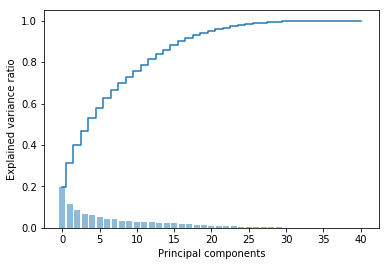

Lowest explained variance ratio: 8.885539384660734e-35


In [3]:
pca = PCA()
X = pca.fit_transform(X)


%matplotlib inline 
plt.bar(range(41), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(41), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

print("Lowest explained variance ratio: " + str(pca.explained_variance_ratio_[-1]))


In [4]:
import time

from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split

from numpy import linalg as LA
from matplotlib.colors import ListedColormap
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


start = time.time()
svm_class=SVC(C=8, max_iter=60000, tol=1e-06, kernel="poly", degree=3)
svm_class = svm_class.fit(X_train,y_train)
prediction_svm = svm_class.predict(X_test)
end = time.time()
print("SVM classifier:")
print("Accuracy (Score): {}".format(accuracy_score(y_test, prediction_svm)))
print("Precision: {}".format(precision_score(y_test, prediction_svm)))
print("Recall: {}".format(recall_score(y_test, prediction_svm)))
print("Time (s): {}".format(end-start))

start = time.time()
random_forest_class = RandomForestClassifier(n_estimators=140, max_depth=10)
random_forest_class = random_forest_class.fit(X_train,y_train)
prediction_forest = random_forest_class.predict(X_test)
end = time.time()
print("\nRandom Forest classifier:")
print("Accuracy (Score): {}".format(accuracy_score(y_test, prediction_forest)))
print("Precision: {}".format(precision_score(y_test, prediction_forest)))
print("Recall: {}".format(recall_score(y_test, prediction_forest)))
print("Time (s): {}".format(end-start))

start = time.time()
mlp_class = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,), solver='lbfgs')
prediction_mlp = mlp_class.fit(X_train,y_train).predict(X_test)
end = time.time()
print("\nMLP classifier:")
print("Accuracy (Score): {}".format(accuracy_score(y_test, prediction_mlp)))
print("Precision: {}".format(precision_score(y_test, prediction_mlp)))
print("Recall: {}".format(recall_score(y_test, prediction_mlp)))
print("Time (s): {}".format(end-start))

start = time.time()
svm_linear_class=LinearSVC(C=1, max_iter=20000, tol=1e-06)
svm_linear_class = svm_linear_class.fit(X_train,y_train)
prediction_svm_linear = svm_linear_class.predict(X_test)
end = time.time()
print("\nLinear SVM classifier:")
print("Accuracy (Score): {}".format(accuracy_score(y_test, prediction_svm_linear)))
print("Precision: {}".format(precision_score(y_test, prediction_svm_linear)))
print("Recall: {}".format(recall_score(y_test, prediction_svm_linear)))
print("Time (s): {}".format(end-start))

SVM classifier:
Accuracy (Score): 0.9906103286384976
Precision: 1.0
Recall: 0.96
Time (s): 0.021945714950561523



Random Forest classifier:
Accuracy (Score): 0.9859154929577465
Precision: 0.9895833333333334
Recall: 0.95
Time (s): 0.6547346115112305

MLP classifier:
Accuracy (Score): 0.9835680751173709
Precision: 0.979381443298969
Recall: 0.95
Time (s): 0.029947280883789062

Linear SVM classifier:
Accuracy (Score): 0.9788732394366197
Precision: 0.9690721649484536
Recall: 0.94
Time (s): 0.038893938064575195


In [34]:
C=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 100]
highest_score = 0
best_C = None
for c in C:
    test = LinearSVC(C=c, tol=1e-06).fit(X_train, y_train)
    score = test.score(X_test, y_test)
    if  score > highest_score:
        best_C = c
        highest_score = score
    #print("{}, {}".format(c, score))
            
print("Best hyperparameters for Linear SVM: C={}, with a score of {}".format(best_C, highest_score))


highest_score = 0
best_C = None
for c in C:
    test = SVC(C=c, tol=1e-06, kernel="poly").fit(X_train, y_train)
    score = test.score(X_test, y_test)
    if score > highest_score:
        best_C = c
        highest_score = score
    #print("{}, {}".format(c, score))
            
print("Best hyperparameters for SVM with polynomial function: C={} with a score of {}".format(best_C, highest_score))



Best hyperparameters for Linear SVM: C=2, with a score of 0.9765258215962441


Best hyperparameters for SVM with polynomial function: C=2 with a score of 0.9906103286384976


In [5]:
from sklearn.model_selection import *

warnings.filterwarnings("ignore")

grid_forest_params = [{'n_estimators':[20, 40, 60, 100, 120, 140, 160], 'max_depth': [5,10,15,20]}]
grid_search_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_forest_params, cv=3)
grid_search_forest.fit(X, y)

print("Best Random Forest Score: {}".format(grid_search_forest.best_score_))
print("Best Random Forest Params: {}".format(grid_search_forest.best_estimator_.get_params()))

Best Random Forest Score: 0.9468485418626529
Best Random Forest Params: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 60, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [6]:
grid_mlp_params = [{'hidden_layer_sizes': [(d, ) for d in [5, 10, 25, 50]], 'activation': ['relu', 'tanh', 'logistic', 'identity']}]
grid_search_mlp = GridSearchCV(estimator=MLPClassifier(solver="lbfgs"), param_grid=grid_mlp_params, cv=3)
grid_search_mlp.fit(X, y)
print("Best MLP Score: {}".format(grid_search_mlp.best_score_))
print("Best MLP Params: {}".format(grid_search_mlp.best_estimator_.get_params()))

Best MLP Score: 0.9313264346190028
Best MLP Params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [16]:
test_data = [[31, 24, 36, 17, 19, 1, 27, 37, 6, 48, 26, 0, 7, 24, 0, 33, 30, 33, 0, 32, 39, 31, 8, 0, 0, 0, 23, 25, 1, 27, 29, 27, 9, 50, 47, 29, 9, 32, 37, 38, 47]]
test_data = sc.transform(test_data)
test_data = pca.transform(test_data)

print(mlp_class.predict(test_data))

[1]
